In [1]:
from collections import Counter
import jieba
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import operator
import os
import sys
sys.path.insert(0, '../modules/')

from fintextmin import *  # 使用 modules 中的 fintextmin 模組

In [2]:
text_list = read_text_folder("./datasample/")
print("document number:", len(text_list))

document number: 88


In [3]:
texts = os.listdir('./datasample')
#texts

In [4]:
corpus = []
for text in texts:
    with open('./datasample/{}'.format(text),'r',encoding = 'utf-8') as file:
        corpus.append(file.read())

In [5]:
jieba.load_userdict("add_dict.txt")

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\MD800\AppData\Local\Temp\jieba.cache
Loading model cost 0.653 seconds.
Prefix dict has been built succesfully.


In [6]:
stopWords=[]
with open('stop_dict.txt', 'r', encoding='UTF-8') as file:
    for data in file.readlines():
        data = data.strip()
        stopWords.append(data)

In [7]:
dwc = count_words_in_documents(doc_list = text_list,
                              doc_names = range(len(text_list)),
                              stopwords = stopWords)

In [8]:
doc_word_frequency = {key: {i:Counter(doc)[i] for i in Counter(doc)} for key, doc in dwc.items()}
#sorted(list(doc_word_frequency[7].items()) , key = lambda x: x[1] , reverse=True)[0:20] # 顯示第一篇文章的部份詞彙與對應詞頻
#for i in range (len(text_list)):
   # l_d = sorted(list(doc_word_frequency[i].items()) , key = lambda x: x[1] , reverse=True)
#print(l_d)
for i in range (len(text_list)):
    l_d = sorted(list(doc_word_frequency[i].items()) , key = lambda x: x[1] , reverse=True)
print(l_d)

[('糖朝', 10), ('芝麻糊', 4), ('口味', 3), ('港式', 3), ('脆', 3), ('蔔', 3), ('已經', 2), ('餐廳', 2), ('一貫', 2), ('古典', 2), ('粥品', 2), ('艇仔粥', 2), ('白粥', 2), ('粥', 2), ('滑', 2), ('嫰', 2), ('美味', 2), ('外皮', 2), ('蘿', 2), ('酥皮', 2), ('豆腐花', 2), ('\ufeff', 1), ('九龍尖沙咀', 1), ('多年', 1), ('未曾', 1), ('香江', 1), ('台', 1), ('原因', 1), ('常年', 1), ('吃慣', 1), ('小小', 1), ('不同', 1), ('這回', 1), ('不長', 1), ('中位', 1), ('廣東道', 1), ('馬', 1), ('孛', 1), ('羅', 1), ('漢口', 1), ('小巷', 1), ('地下室', 1), ('小小的', 1), ('店面', 1), ('眼睛', 1), ('不睜大點還', 1), ('走過', 1), ('了頭', 1), ('以前', 1), ('大門', 1), ('差多', 1), ('期待', 1), ('扶梯', 1), ('盛世', 1), ('甜品', 1), ('王朝', 1), ('字樣', 1), ('眼前', 1), ('終於', 1), ('古色古香', 1), ('典雅', 1), ('裝潢', 1), ('保持', 1), ('木櫃裡', 1), ('放置', 1), ('代青性', 1), ('豆腐', 1), ('花桶', 1), ('光', 1), ('狂', 1), ('流口水', 1), ('心中', 1), ('太多', 1), ('能點', 1), ('先', 1), ('喝口', 1), ('熱茶', 1), ('沈下', 1), ('心來', 1), ('久', 1), ('最適', 1), ('合作', 1), ('莫過', 1), ('系列', 1), ('點份', 1), ('盡情', 1), ('各式', 1), ('新鮮', 1), ('海味', 1), ('喝到', 1), (

In [9]:
doc_names = range(len(text_list))
dwc = {key: [word for word in jieba.cut(text, cut_all=False)] for (key, text) in zip(doc_names, text_list)}

In [10]:
# 查詢斷完詞後的 list 
corpus_cut = [jieba.lcut(t) for t in corpus]
#corpus_cut

#文章數量要夠多才能用
#sorted_d = sorted(doc_word_frequency.items(), key=operator.itemgetter(1), reverse = True)
檢查字典
利用coshow

In [11]:
##a = [[1, 2], [3, 4]] 大概是這概念
cut = [i for sublist in corpus_cut for i in sublist]
new_dic = []
for i in range(len(cut) - 1):
    assemble_word = cut[i]+cut[i+1]
    new_dic.append(assemble_word)
    #print(cut[i]+cut[i+1])
#    print(assemble_word)
#    #print(new_dic)

In [12]:
#def add_word(list):
#    for items in list:
#        jieba.add_word(items)
#add_word(new_dic)
#doc_names = range(len(text_list))
#dwc = {key: [word for word in jieba.cut(text, cut_all=False)] for (key, text) in zip(doc_names, text_list)}
#doc_word_frequency = {key: {i:Counter(doc)[i] for i in Counter(doc)} for key, doc in dwc.items()}
#list(doc_word_frequency[0].items())[0:10] # 顯示第一篇文章的部份詞彙與對應詞頻
#sorted(list(doc_word_frequency[0].items()) , key = lambda x: x[1] , reverse=True)

In [13]:
# 斷詞後的 list 變成用空格把每個詞分開的形式
corpus = [' '.join(lcut) for lcut in corpus_cut]
# 可以接到 apriori 的過程

In [14]:
## [原生 python 寫法] 
dwf_list = [pd.DataFrame(list(doc.values()), index=doc.keys()) for doc in doc_word_frequency.values()]
wfm = pd.concat(dwf_list, axis= 1)
wfm = np.transpose(wfm).fillna(0)
wfm.index = doc_word_frequency.keys()

puncs = set_puncs() # 因為一開始沒有清除標點符號,這邊回過頭來將它們自矩陣移除
wfm = wfm[list(set(wfm) - set(puncs))]
wfm # 詞頻矩陣完成

## [使用 fintextmin 寫法]
# wfm = create_word_frequency_matrix(dwc)

C:\Users\MD800\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


,害人,鳳爪,不太愛吃,義牛,甘諾道,記走,吃掉,建有,省略,加多點,...,滾尿流,展覽主題,種鳥,賀歲,會額,Camper,鞋櫃,舊式,折價,冰茶
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
from sklearn import feature_extraction
from sklearn.feature_extraction.text import TfidfTransformer

## [原生 python 寫法] 
transformer = TfidfTransformer()
tfidf_gen = transformer.fit_transform(wfm) # 產生一個 tfidf 矩陣的 generator
df_tfidf = pd.DataFrame(tfidf_gen.toarray(), columns=wfm.columns)
df_tfidf

## [使用 fintextmin 寫法]
# df_tfidf = evaluate_tfidf(wfm)

,害人,鳳爪,不太愛吃,義牛,甘諾道,記走,吃掉,建有,省略,加多點,...,滾尿流,展覽主題,種鳥,賀歲,會額,Camper,鞋櫃,舊式,折價,冰茶
0,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000
1,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000
2,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000
3,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000
4,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000
5,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000
6,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000
7,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000
8,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000
9,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000


In [16]:
first_text = wfm.to_dict(orient='records')[0] # 將詞頻矩陣轉換成dictionary型別, 把第一篇文章抽出來
list(first_text.items())[0:20] # 檢視一下轉換結果

[('害人', 0.0),
 ('鳳爪', 0.0),
 ('不太愛吃', 0.0),
 ('義牛', 0.0),
 ('甘諾道', 0.0),
 ('記走', 0.0),
 ('吃掉', 0.0),
 ('建有', 0.0),
 ('省略', 0.0),
 ('加多點', 0.0),
 ('隨停', 0.0),
 ('船程', 0.0),
 ('斬', 0.0),
 ('搜尋', 0.0),
 ('草莓', 0.0),
 ('注重', 0.0),
 ('未', 0.0),
 ('可選擇', 0.0),
 ('香港旅遊發展局', 2.0),
 ('真相', 0.0)]

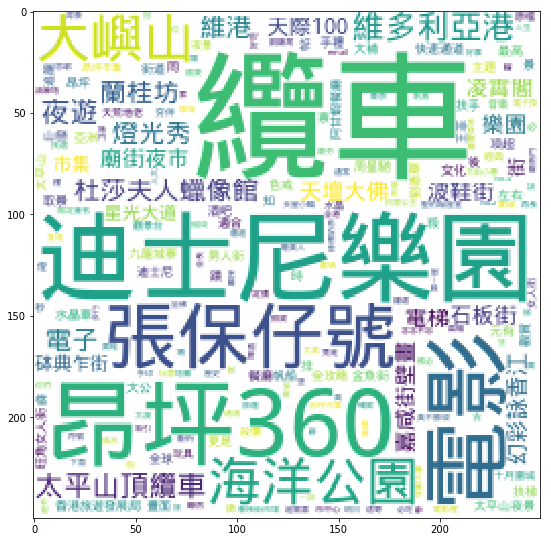

In [17]:
#linux_font = r'/Users/leeyishan/Documents/GitHub/in_home/FinalProject/wqy-microhei.ttc'
linux_font = r'/Users/MD800/Documents/GitHub/in_home/FinalProject/wqy-microhei.ttc'
#linux_font = r'/Users/Minerva/Documents/GitHub_table_computer/in_home/FinalProject/wqy-microhei.ttc'
#記得自行需要下載，與修改路徑 
plt.figure(figsize=(20, 20))
ax1 = plt.subplot(121)
plot_wordcloud(first_text, ax=ax1, font_path=linux_font, height=250, width=250)


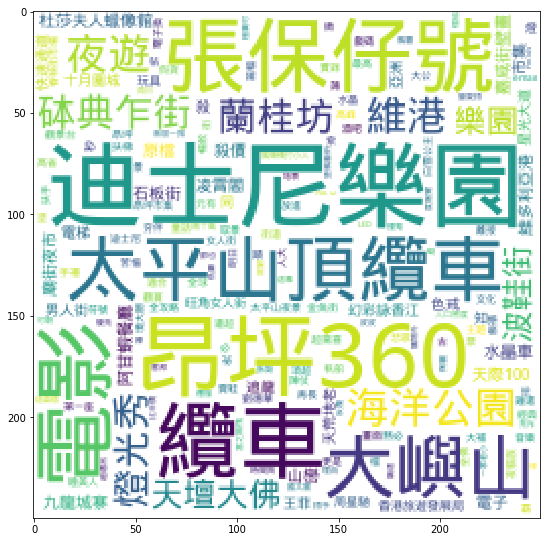

In [18]:
#修正過後
plt.figure(figsize=(20, 20))
ax2 = plt.subplot(122)
plot_tfidf_wordcloud(df_tfidf, text_index=0, ax=ax2, font_path=linux_font, height=250, width=250)

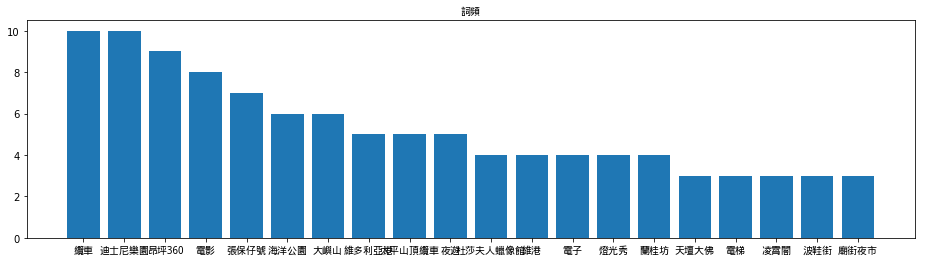

In [19]:
plt.figure(figsize=(35, 4))
ax1 = plt.subplot(121)
plot_tf_bar(first_text, ax=ax1, font_path=linux_font, title="詞頻")

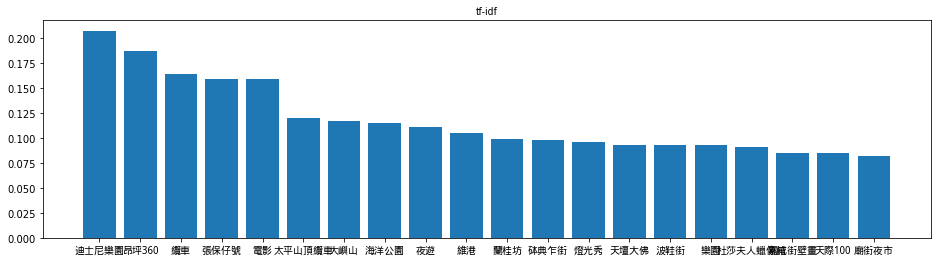

In [20]:
#修正過後
plt.figure(figsize=(35, 4))
ax2 = plt.subplot(122)
plot_tfidf_bar(df_tfidf, text_index=0, ax=ax2, font_path=linux_font, title="tf-idf")